# Expected allele frequency with genetic drift

## (1) Over one generation

We assume to have 50 diploid individuals and an allele frequency of 0.50.

In [45]:
N <- 50
fA <- 0.5

A binomial distribution models the sampling with replacement of gene copies.
The next cells illustrate how to perform a random sampling from a binomial distribution with 2N samples and probability of "success" equal to $f_A$. Since we are interested in frequencies and not counts, we then divide by 2N.

In [46]:
rbinom(1, 2*N, fA) / (2*N)

[1] 0.43

In [47]:
rbinom(1, 2*N, 0.53) / (2*N)

[1] 0.55

__EXERCISE__ How do we calculate the expected allele frequency at the next generation? We can repeat the experiment many times and calculate the average value, then...

Each group could use a different initial allele frequency or sample size.

[1] "Mean allele frequency:  0.699573"


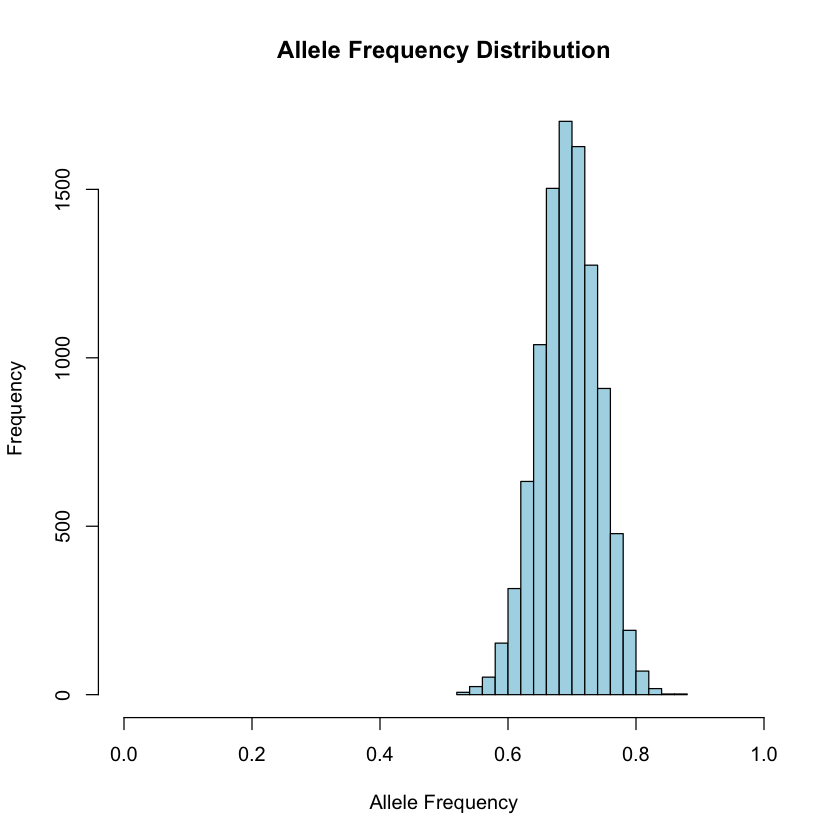

In [48]:
N <- 50
fA <- 0.7
num_gen <- 10000 

af_vec <- c()

for (i in 1:num_gen) {
    af <- rbinom(1, 2 * N, fA) / (2 * N)

    af_vec <- c(af_vec, af)
}

hist(af_vec,
    breaks = 20, 
    col = "lightblue", 
    xlab = "Allele Frequency", ylab = "Frequency", 
    main = "Allele Frequency Distribution", 
    xlim = c(0, 1)
)

print(paste("Mean allele frequency: ", mean(af_vec)))

What do these results suggest? Does the expected allele frequency change or not after one generation? Do allele frequencies change or not after one generation?

Prove that your conclusions stay the same if you vary the initial allele frequency and/or sample size.

## (2) Over many generations

Scenario similar to above, but with a starting allele frequency of 0.50, 50 diploid individuals and 100 generations.

In [49]:
N <- 50
# 100 generations
fA <- rep(NA, 100)
# at t=0
fA[1] <- 0.50

We repeat the sampling procedure at each generation.

In [50]:
# Populate the allele frequency vector
for (t in 1:99) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)

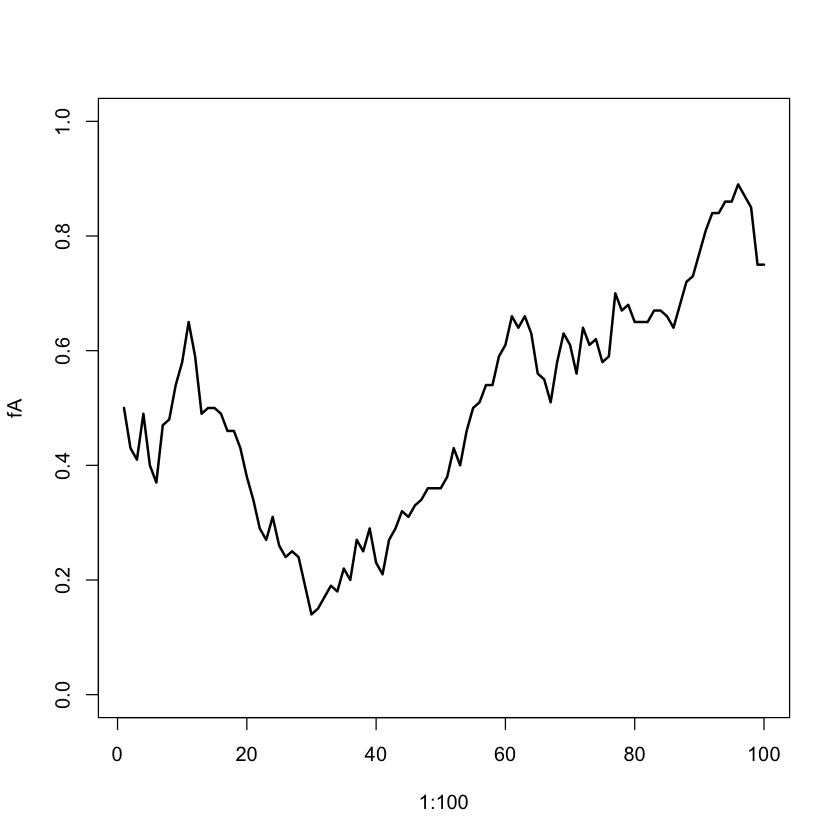

In [51]:
# Plot the allele frequency over time
plot(x=1:100, y=fA, type="l", ylim=c(0,1), lwd=2)

Wasn't the expected allele frequency supposed not to change after each generation? What's happening?

Let's assume that we repeat the whole history for 100 generations many times (i.e. 20) and record the trajectory of the allele frequency.

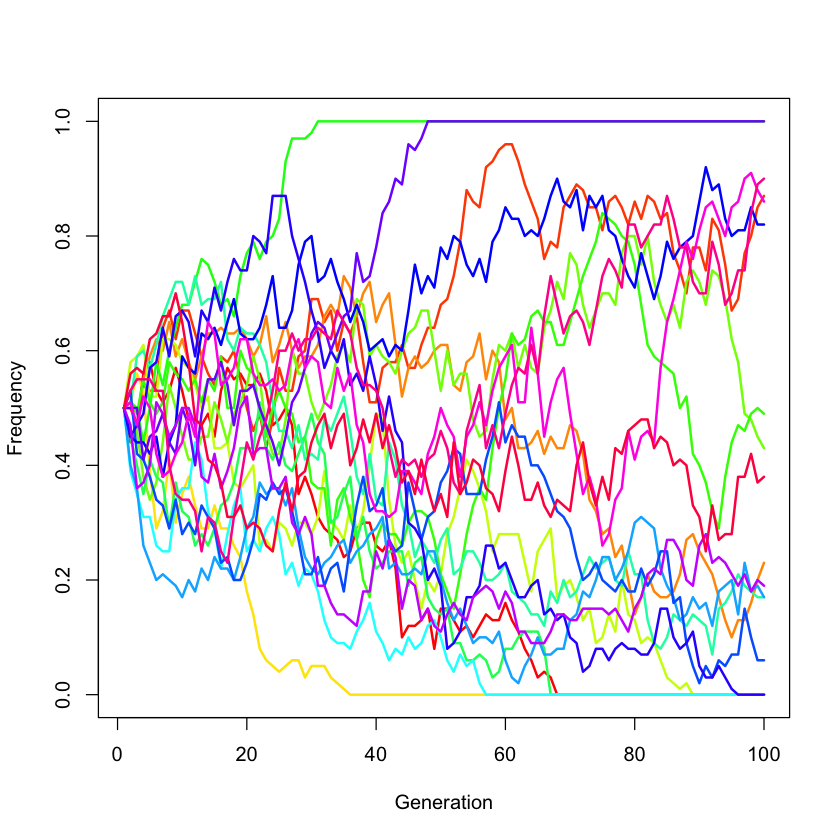

In [52]:
N <- 50 # size
gen <- 100 # generations
nrepl <- 20 # number of distinct simulations

# Initialize an empty plot
plot(1:gen, type = "n", ylim = c(0, 1), xlab = "Generation", ylab = "Frequency")

# Create a color palette with nrepl number of colors
colors <- rainbow(nrepl)

for (j in 1:nrepl) {
    # Initiate the allele frequency vector
    fA <- rep(NA, gen)
    # Set the initial allele frequency
    fA[1] <- 0.5
    # Populate the allele frequency vector
    for (t in 1:(gen - 1)) {
        fA[t + 1] <- rbinom(1, 2 * N, fA[t]) / (2 * N)
    }
    lines(x = 1:gen, y = fA, type = "l", lwd = 2, col = colors[j])
}

__EXERCISE__ What is the chance that an allele at 50% at time 0 goes to fixation (100%) or is lost (0%)? To answer this question run the experiment above over more generations and more replicate and see what happens. Calculate the proportion of alleles that are fixed or lost at the end of your experiment. What happens if you change the initial allele frequency? Do these proportions change?

[1] "Proportion of alleles fixed: 0.45"
[1] "Proportion of alleles lost: 0.55"


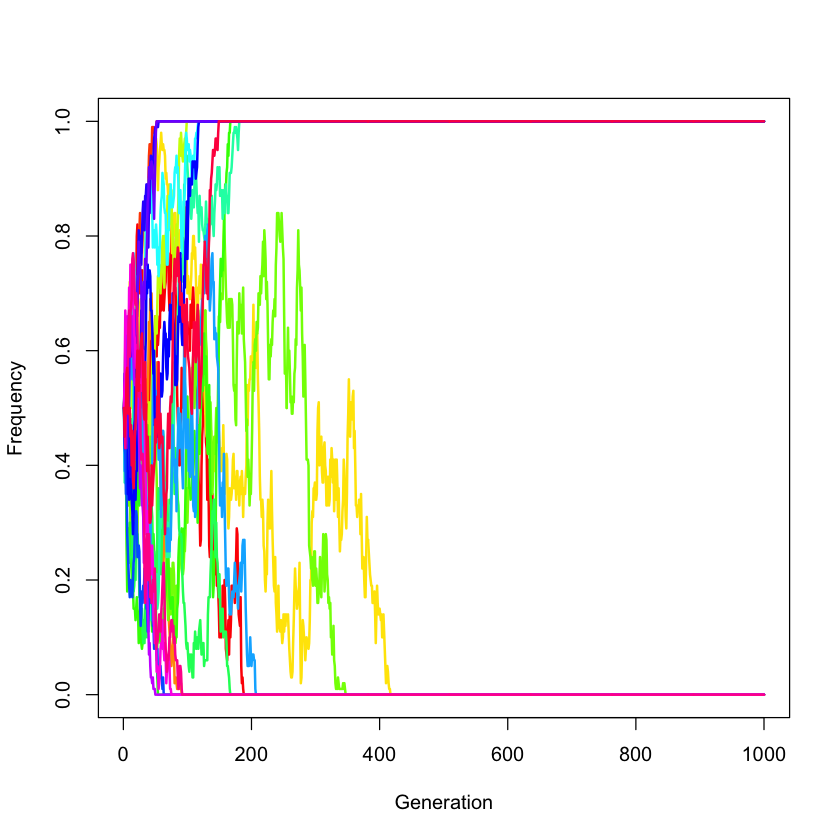

In [53]:
N <- 50 # size
gen <- 1000 # generations
nrepl <- 20 # number of distinct simulations

# Initialize an empty plot
plot(1:gen, type = "n", ylim = c(0, 1), xlab = "Generation", ylab = "Frequency")

# Create a color palette with nrepl number of colors
colors <- rainbow(nrepl)

fixed_sims <- 0
lost_sims <- 0

for (j in 1:nrepl) {
    # Initiate the allele frequency vector
    fA <- rep(NA, gen)
    # Set the initial allele frequency
    fA[1] <- 0.5
    # Populate the allele frequency vector
    for (t in 1:(gen - 1)) {
        fA[t + 1] <- rbinom(1, 2 * N, fA[t]) / (2 * N)
    }
    lines(x = 1:gen, y = fA, type = "l", lwd = 2, col = colors[j])

    if (fA[gen] == 0) {
        lost_sims <- lost_sims + 1
    } else if (fA[gen] == 1) {
        fixed_sims <- fixed_sims + 1
    }
}

prop_fixed <- fixed_sims / nrepl
prop_lost <- lost_sims / nrepl

print(paste("Proportion of alleles fixed:", prop_fixed))
print(paste("Proportion of alleles lost:", prop_lost))

## (3) Effect of population size

Let's consider the effect of population size on the drift process.

__EXERCISE__ Repeat the experiment above (2) for different population sizes. For instance, run two sets of experiments varying $N$.

Which population experiences more drift?

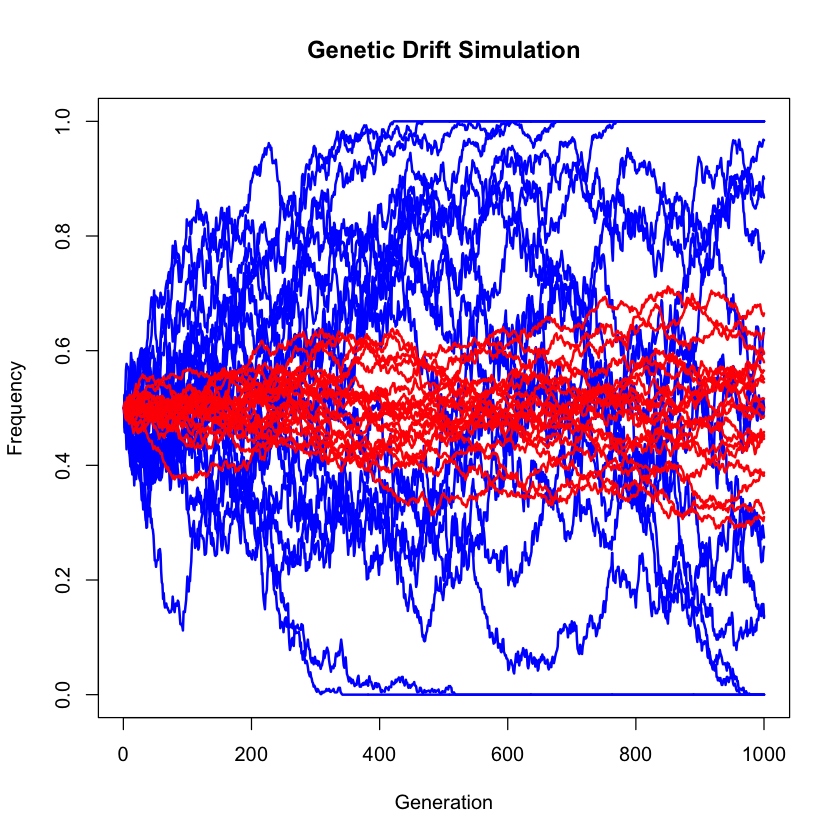

In [54]:
# small population (blue)
N_small <- 500

# large population (red)
N_large <- 10000

drift_sim <- function(N, gen, nrepl, color, plot = FALSE) {
    
    if (plot == TRUE) {
        # Initialize an empty plot
        plot(1:gen,
            type = "n", 
            ylim = c(0, 1), 
            xlab = "Generation", ylab = "Frequency",
            main = paste("Population size: ", N)
        )
    }

    for (j in 1:nrepl) {
        # Initiate the allele frequency vector
        fA <- rep(NA, gen)
        # Set the initial allele frequency
        fA[1] <- 0.5
        # Populate the allele frequency vector
        for (t in 1:(gen - 1)) {
            fA[t + 1] <- rbinom(1, 2 * N, fA[t]) / (2 * N)
        }

        lines(x = 1:gen, y = fA, type = "l", lwd = 2, col = color)
    }    
}

plot(1:gen,
    type = "n",
    ylim = c(0, 1),
    xlab = "Generation", ylab = "Frequency",
    main = "Genetic Drift Simulation"
)

drift_sim(N_small, gen, nrepl, "blue")

drift_sim(N_large, gen, nrepl, "red")

Which population experiences more drift? Change the values of population sizes and confirm that your general statement is still true.

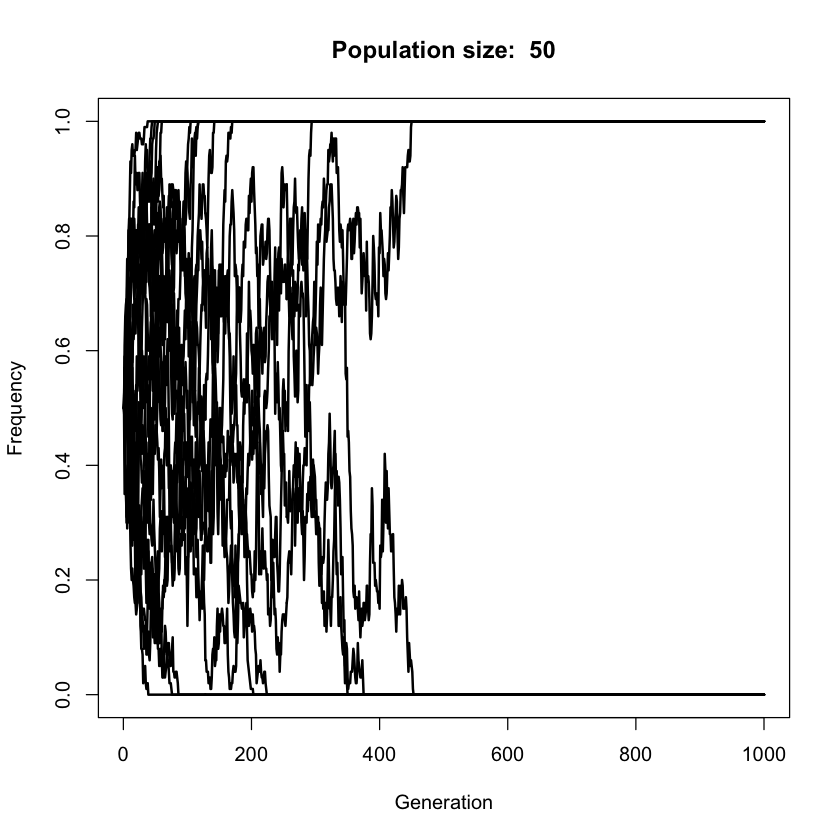

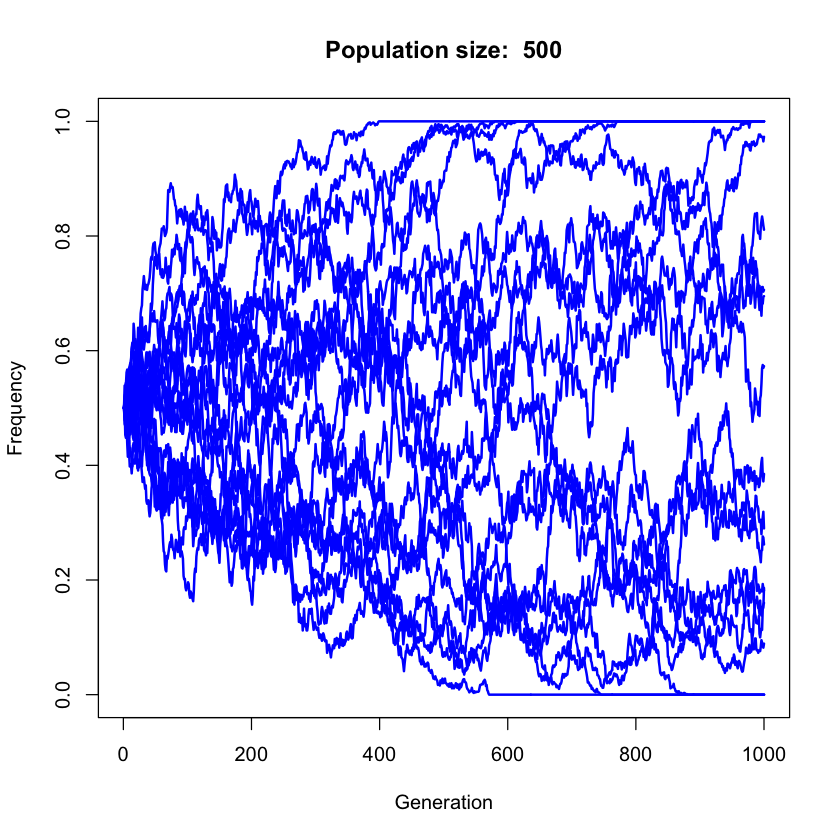

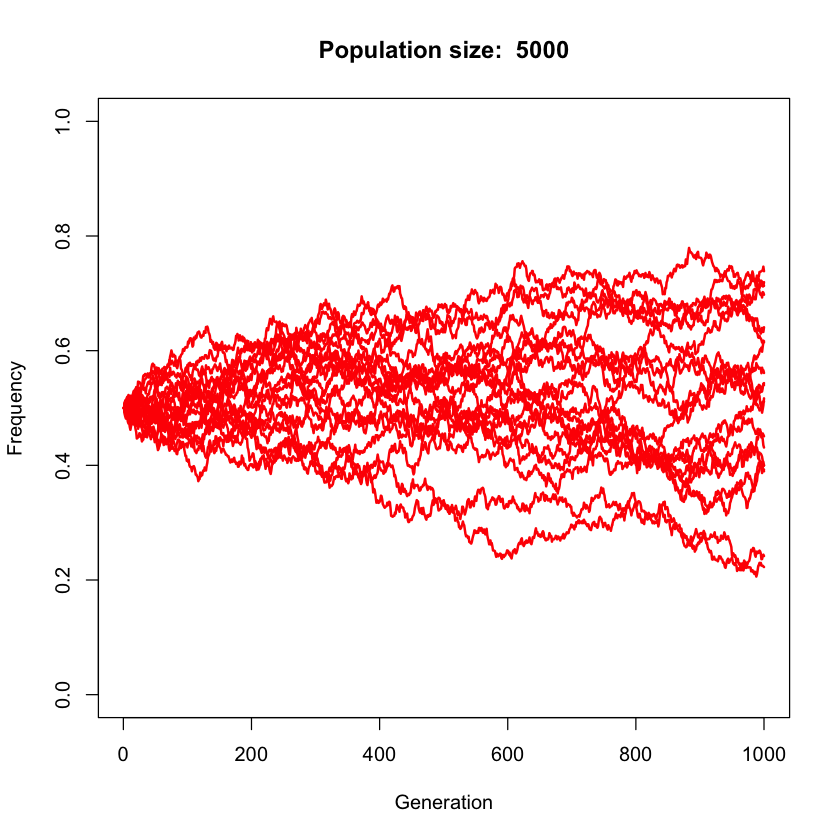

In [55]:
drift_sim(50, gen, nrepl, "black", plot = TRUE)
drift_sim(500, gen, nrepl, "blue", plot = TRUE)
drift_sim(5000, gen, nrepl, "red", plot = TRUE)